## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import ceil


## Carga de datos

Descripción de las columnas:

- `Property ID`:
- `Property Type`:
- `Listing Type`:
- `Bedrooms`:
- `Reporting Month`:
- `Occupancy Rate`:
- `Revenue (USD)`:
- `Revenue(Native)`:
- `ADR (USD)`:
- `ADR (Native)`:
- `Number of Reservations`:
- `Reservation Days`:
- `Available Days`:
- `Blocked Days`:
- `Country`:
- `State`:
- `City`:
- `Latitude`:
- `Longitude`:
- `Active`:
- `Scraped During Month`:
- `Currency Native`:
- `Airbnb Property ID`:
- `HomeAway Property Manager`:

In [2]:
path = os.path.join(os.getcwd(), 'data/processed_monthly.csv')

df = pd.read_csv(path, sep=',', decimal='.')

df.head(3)

C:\Users\Multivac Desktop\AppData\Local\Temp\ipykernel_13496\1201202551.py:3: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=',', decimal='.')


,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,Country,State,City,Latitude,Longitude,Active,Scraped During Month,Currency Native,Airbnb Property ID,HomeAway Property Manager
0,ab-295403,Entire apartment,Entire home/apt,2,2016-06-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
1,ab-295403,Entire apartment,Entire home/apt,2,2016-07-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,True,EUR,295403.0,NaN
2,ab-295403,Entire apartment,Entire home/apt,2,2016-08-01,0.0,0.0,0.0,NaN,NaN,...,Spain,NaN,Guardamar del Segura,38.095559,-0.656122,False,False,EUR,295403.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950448 entries, 0 to 950447
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Property ID                950448 non-null  object 
 1   Property Type              950307 non-null  object 
 2   Listing Type               950400 non-null  object 
 3   Bedrooms                   950448 non-null  int64  
 4   Reporting Month            950448 non-null  object 
 5   Occupancy Rate             950448 non-null  float64
 6   Revenue (USD)              950448 non-null  float64
 7   Revenue (Native)           713678 non-null  float64
 8   ADR (USD)                  306907 non-null  float64
 9   ADR (Native)               241112 non-null  float64
 10  Number of Reservations     950448 non-null  int64  
 11  Reservation Days           950448 non-null  int64  
 12  Available Days             950448 non-null  int64  
 13  Blocked Days               95

In [4]:
# Analisis de nulos
num_duplicated = df.duplicated().sum()
print(f'Número de líneas duplicadas: {num_duplicated}')

num_nulls = df.isnull().sum().sum()
print(f'Valores nulos: {num_nulls}')

Número de líneas duplicadas: 0
Valores nulos: 3036092


In [5]:
df.isnull().sum().sort_values(ascending=False)

HomeAway Property Manager    920604
ADR (Native)                 709336
ADR (USD)                    643541
Revenue (Native)             236770
Currency Native              236770
Airbnb Property ID           236758
State                         52112
Property Type                   141
Listing Type                     48
Country                          12
Revenue (USD)                     0
Bedrooms                          0
Property ID                       0
Occupancy Rate                    0
Reporting Month                   0
Reservation Days                  0
Available Days                    0
Blocked Days                      0
Number of Reservations            0
City                              0
Active                            0
Longitude                         0
Latitude                          0
Scraped During Month              0
dtype: int64

Eliminamos las columnas de HomeAway, ADR

In [6]:
df = df.drop(columns=['HomeAway Property Manager', 'ADR (Native)', 'ADR (USD)'])

## Funciones auxiliares

In [7]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)


def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

## Análisis Exploratorio (EDA)

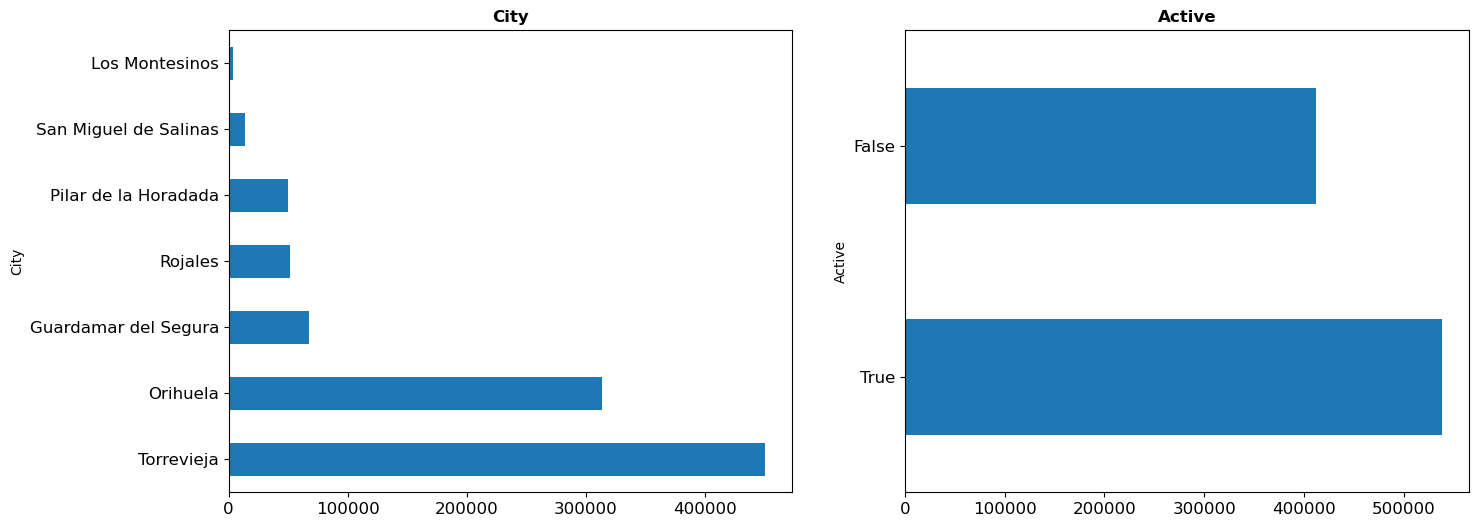

In [9]:
graficos_eda_categoricos(df[['City', 'Active']])

In [10]:
estadisticos_cont(df[['Bedrooms', 'Occupancy Rate', 'Reservation Days', 'Available Days', 'Blocked Days', 'Number of Reservations', 'Revenue (Native)']])

,count,mean,median,std,min,25%,50%,75%,max
Bedrooms,950448.0,2.159897,2.0,0.972775,0.0,2.0,2.0,3.000,23.00
Occupancy Rate,950448.0,0.193775,0.0,0.335962,0.0,0.0,0.0,0.273,1.00
Reservation Days,950448.0,3.981306,0.0,7.701028,0.0,0.0,0.0,4.000,31.00
Available Days,950448.0,15.866806,17.0,13.330054,0.0,0.0,17.0,30.000,31.00
Blocked Days,950448.0,9.927735,0.0,13.090532,0.0,0.0,0.0,27.000,31.00
Number of Reservations,950448.0,0.864512,0.0,1.771497,0.0,0.0,0.0,1.000,30.00
Revenue (Native),713678.0,372.677158,0.0,966.317105,0.0,0.0,0.0,325.110,118097.79
